In [1]:
import tensorflow as tf
import qresnet
import dataset
from tensorflow import keras
from keras import layers
from qkeras import *

In [2]:
x_train, y_train, x_test, y_test = dataset.load_cifar10()

(50000, 1)


In [3]:
x = x_in = layers.Input(x_train.shape[1:], name="input")
x = qresnet.resnet32(x, num_classes=10)
qmodel = keras.Model(inputs=[x_in], outputs=[x])
qmodel.summary()

c:\Users\georg\Desktop\mestrado_luiz\deep_nibble_dnn\.venv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 34, 34, 3)    0           ['input[0][0]']                  
                                                                                                  
 qconv1 (Conv2D)                (None, 32, 32, 16)   432         ['conv1_pad[0][0]']              
                                                                                                  
 bn1 (BatchNormalization)       (None, 32, 32, 16)   64          ['qconv1[0][0]']                 
                                                                                              

In [4]:
class ResNetPaperLR(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_lr = 0.1, lr_decay=10, steps=[32000, 48000]):
        super(ResNetPaperLR, self).__init__()
        self.initial_lr = initial_lr
        self.learning_rate_decay = lr_decay
        self.steps = steps
        self.current_lr = 0
    def __call__(self, step):        
        step12 = tf.where(step < self.steps[1], self.initial_lr/self.learning_rate_decay, self.initial_lr/(self.learning_rate_decay**2))    
        step01 = tf.where(step < self.steps[0], self.initial_lr, step12)
        return step01
                         

    def get_config(self):
        return {
            "initial_lr": self.initial_lr,
            "learning_rate_decay": self.learning_rate_decay,
            "steps": self.steps
        }


NB_EPOCH = 164
BATCH_SIZE = 128
VERBOSE = 1

OPTIMIZER = keras.optimizers.Adam(learning_rate=0.001)

qmodel.compile(optimizer=OPTIMIZER, loss=keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.02), metrics=["accuracy"])


In [5]:
history = qmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, initial_epoch=0, verbose=VERBOSE, validation_data=(x_test, y_test), validation_freq=2)


Epoch 1/164
391/391 [==============================] - 47s 98ms/step - loss: 2.2153 - accuracy: 0.1651
Epoch 2/164
391/391 [==============================] - 47s 119ms/step - loss: 2.0387 - accuracy: 0.2601 - val_loss: 2.3218 - val_accuracy: 0.1707
Epoch 3/164
391/391 [==============================] - 39s 100ms/step - loss: 1.8872 - accuracy: 0.3224
Epoch 4/164
391/391 [==============================] - 44s 113ms/step - loss: 1.7888 - accuracy: 0.3609 - val_loss: 1.7610 - val_accuracy: 0.3722
Epoch 5/164
391/391 [==============================] - 39s 100ms/step - loss: 1.7213 - accuracy: 0.3879
Epoch 6/164
391/391 [==============================] - 44s 113ms/step - loss: 1.6602 - accuracy: 0.4106 - val_loss: 1.7491 - val_accuracy: 0.3816
Epoch 7/164
391/391 [==============================] - 39s 100ms/step - loss: 1.6159 - accuracy: 0.4286
Epoch 8/164
391/391 [==============================] - 44s 113ms/step - loss: 1.5728 - accuracy: 0.4424 - val_loss: 1.6975 - val_accuracy: 0.4047
E

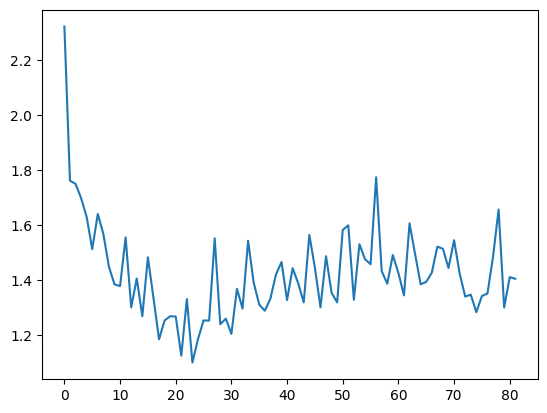

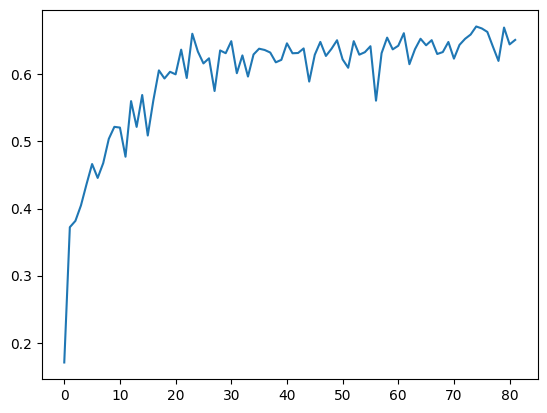

In [6]:
import matplotlib.pyplot as plt


#plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()    
#plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()    

In [35]:
OPTIMIZER = keras.optimizers.Adam(learning_rate=0.0001)
qmodel.compile(optimizer=OPTIMIZER, loss=keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.02), metrics=["accuracy"])
hist_finetun = qmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=2, initial_epoch=0, verbose=VERBOSE, validation_data=(x_test, y_test), validation_freq=2)


Epoch 1/2
391/391 [==============================] - 85s 97ms/step - loss: 0.1983 - accuracy: 0.9890
Epoch 2/2
391/391 [==============================] - 45s 116ms/step - loss: 0.1972 - accuracy: 0.9899 - val_loss: 1.1885 - val_accuracy: 0.7015


In [36]:
from qkeras.utils import model_save_quantized_weights

d = model_save_quantized_weights(qmodel, "qmodels/resnet32_hybrid/qmodel.hdf5")

eval = qmodel.evaluate(x_test, y_test)

print(eval)


... quantizing model
  qconv1 has not been quantized
  bn1 has not been quantized
  qlayer1.0.bn1 has not been quantized
  qlayer1.0.bn2 has not been quantized
  qlayer1.1.bn1 has not been quantized
  qlayer1.1.bn2 has not been quantized
  qlayer1.2.bn1 has not been quantized
  qlayer1.2.bn2 has not been quantized
  qlayer1.3.bn1 has not been quantized
  qlayer1.3.bn2 has not been quantized
  qlayer1.4.bn1 has not been quantized
  qlayer1.4.bn2 has not been quantized
  qlayer2.0.bn1 has not been quantized
  qlayer2.0.downsample.1 has not been quantized
  qlayer2.0.bn2 has not been quantized
  qlayer2.1.bn1 has not been quantized
  qlayer2.1.bn2 has not been quantized
  qlayer2.2.bn1 has not been quantized
  qlayer2.2.bn2 has not been quantized
  qlayer2.3.bn1 has not been quantized
  qlayer2.3.bn2 has not been quantized
  qlayer2.4.bn1 has not been quantized
  qlayer2.4.bn2 has not been quantized
  qlayer3.0.bn1 has not been quantized
  qlayer3.0.downsample.1 has not been quantized
  q

1/1 [==============================] - 2s 2s/step
input                            0.0000   1.0000
qrelu1                           0.0000   1.0000

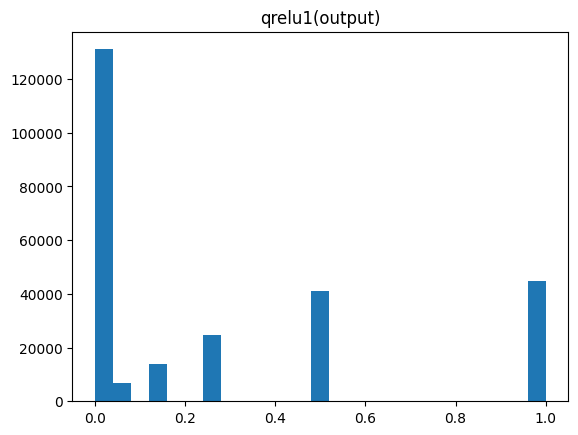


qlayer1.0.conv1                -16.1133  12.5877

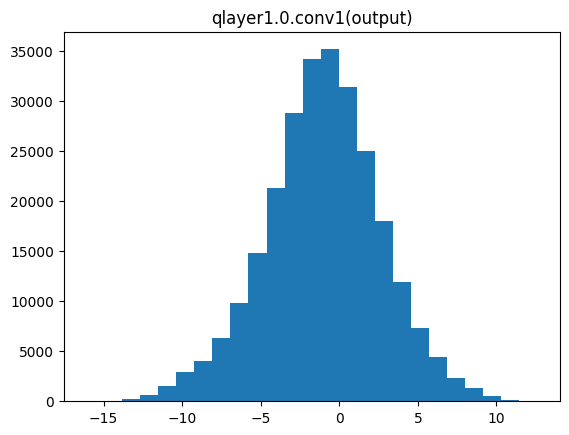

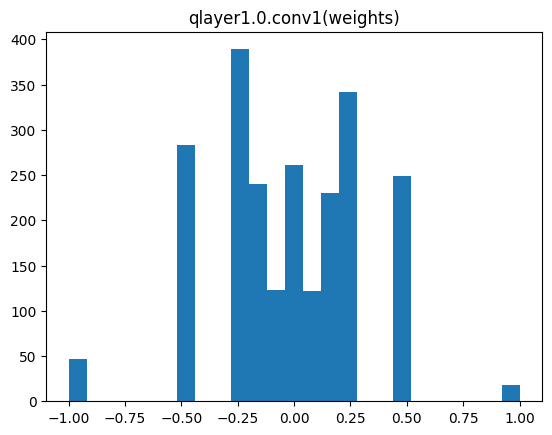

 ( -1.0000   1.0000)
qlayer1.0.relu1                  0.0000   1.0000

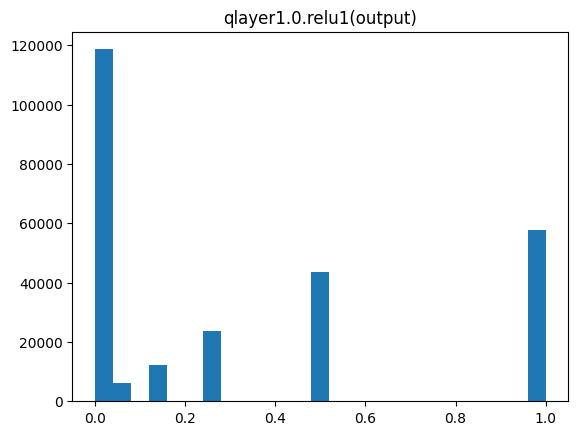


qlayer1.0.conv2                -12.3225  13.8124

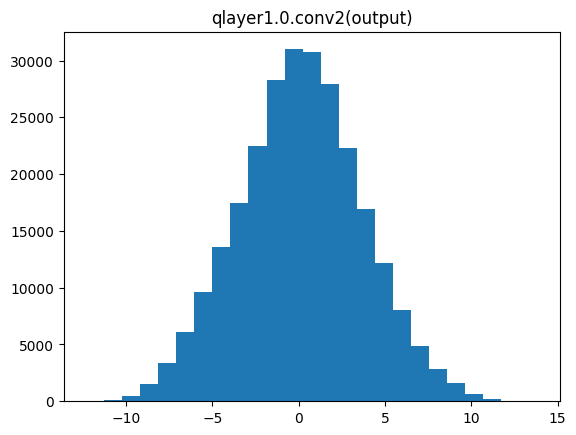

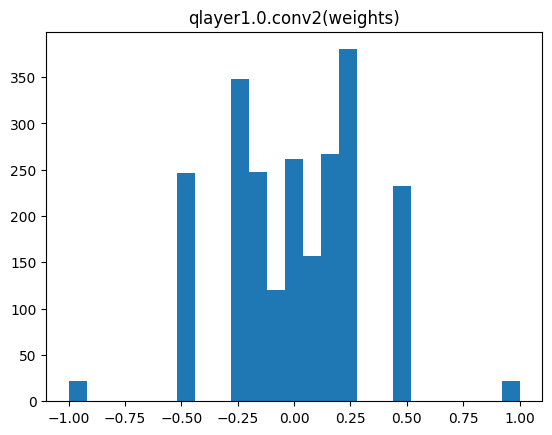

 ( -1.0000   1.0000)
qlayer1.0.relu2                  0.0000   1.0000

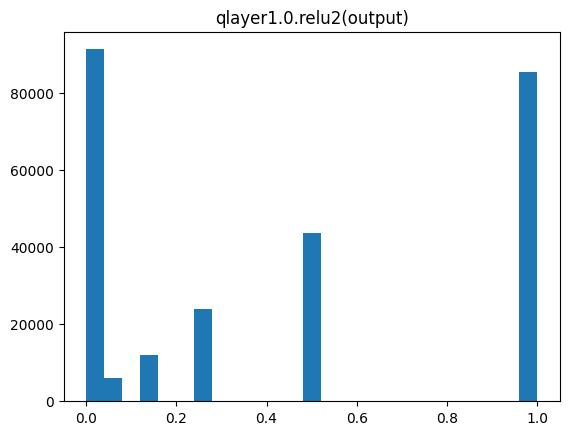


qlayer1.1.conv1                -13.9931  12.4052

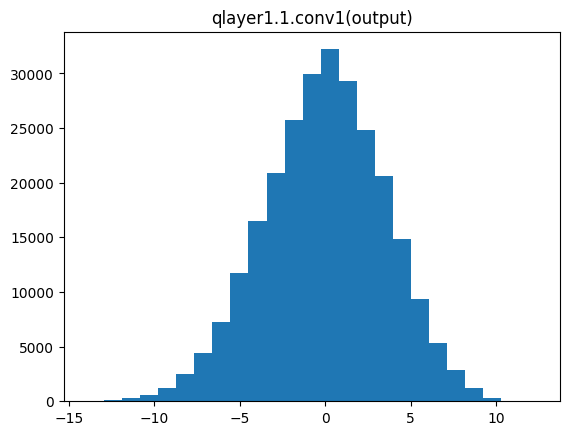

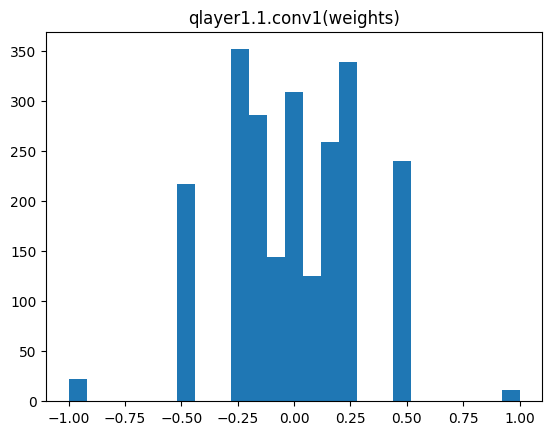

 ( -1.0000   1.0000)
qlayer1.1.relu1                  0.0000   1.0000

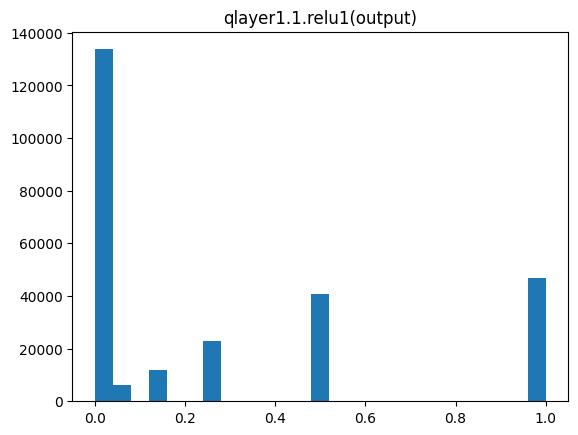


qlayer1.1.conv2                -11.6033  11.2196

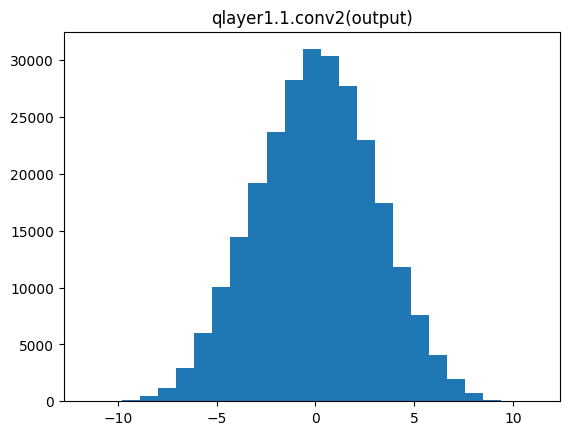

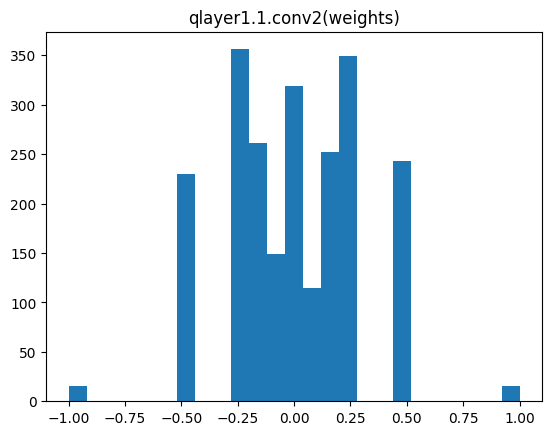

 ( -1.0000   1.0000)
qlayer1.1.relu2                  0.0000   1.0000

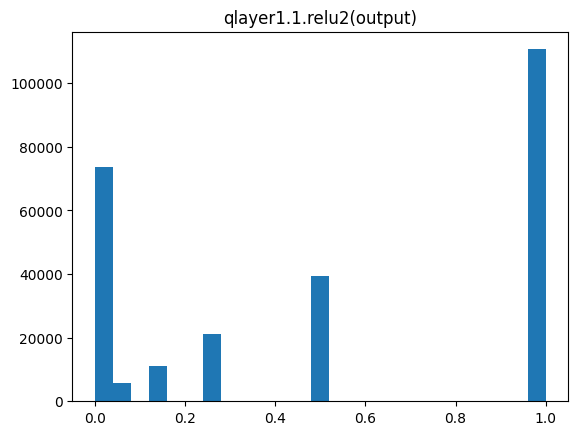


qlayer1.2.conv1                -14.3066  11.9101

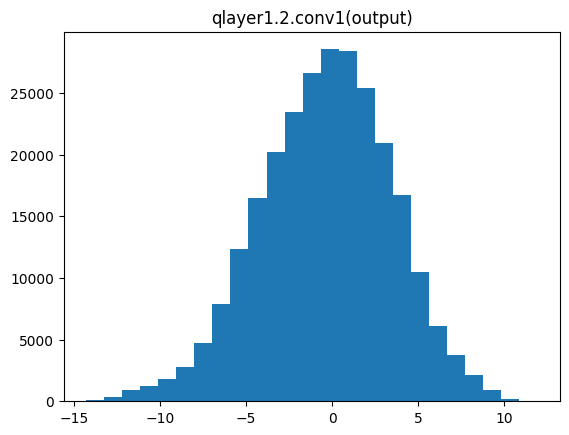

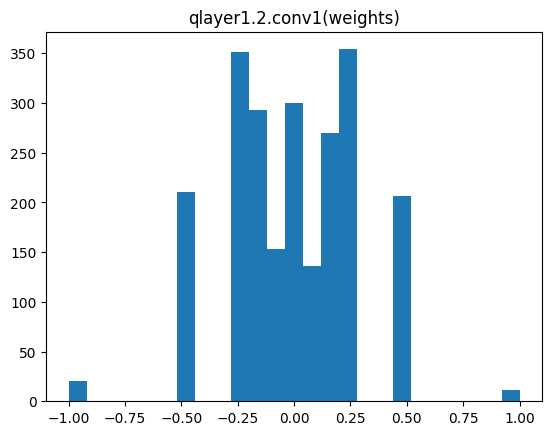

 ( -1.0000   1.0000)
qlayer1.2.relu1                  0.0000   1.0000

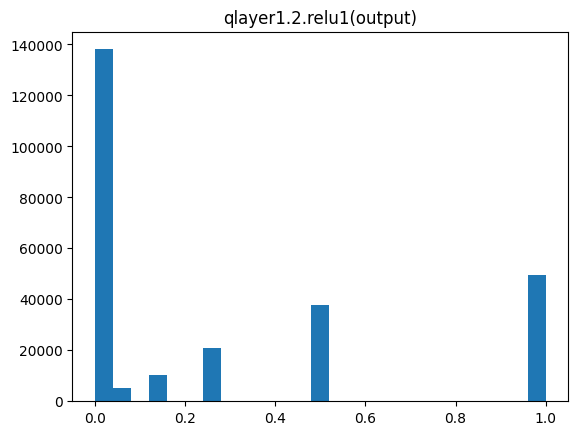


qlayer1.2.conv2                -12.1054  11.3007

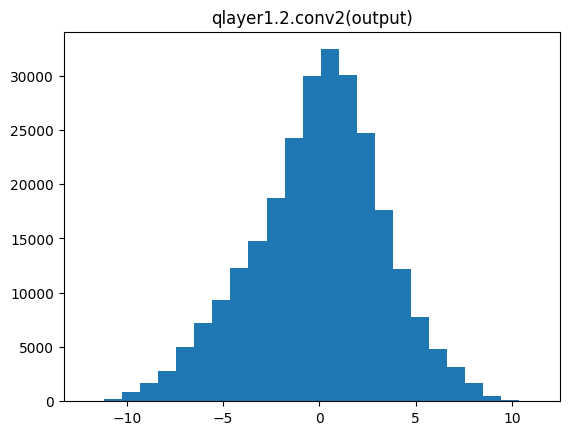

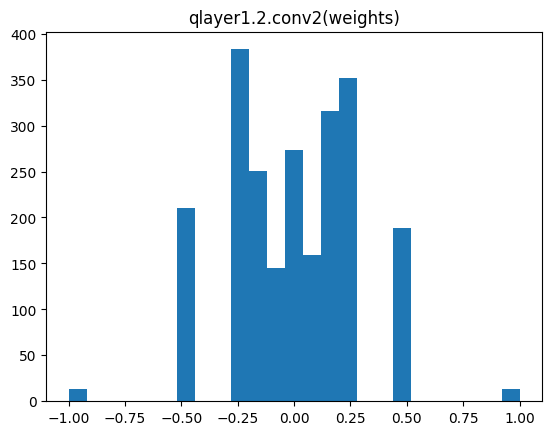

 ( -1.0000   1.0000)
qlayer1.2.relu2                  0.0000   1.0000

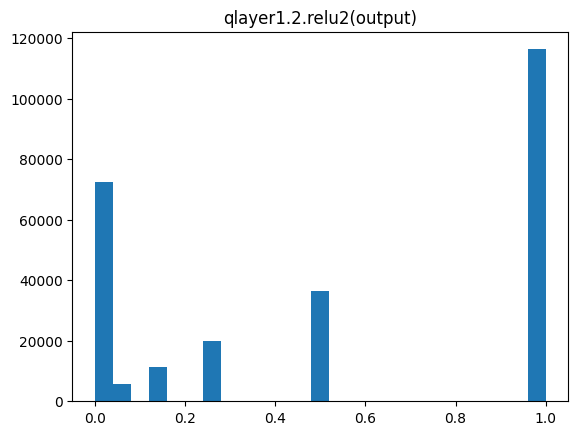


qlayer1.3.conv1                -13.3832  13.8349

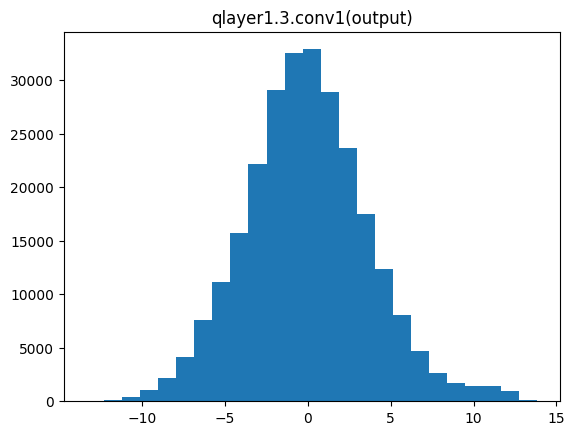

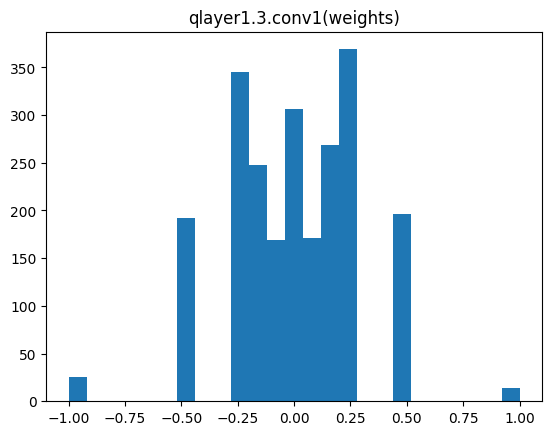

 ( -1.0000   1.0000)
qlayer1.3.relu1                  0.0000   1.0000

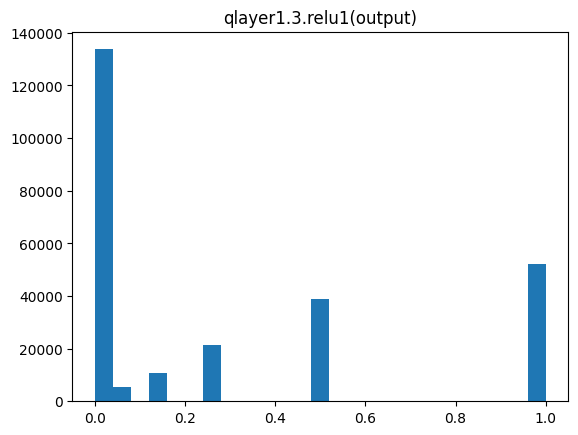


qlayer1.3.conv2                -13.7606  13.0165

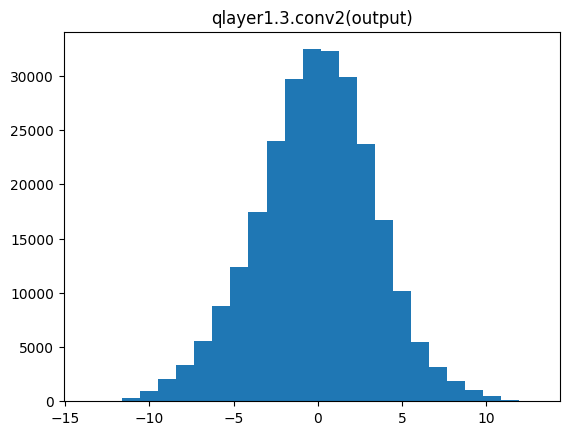

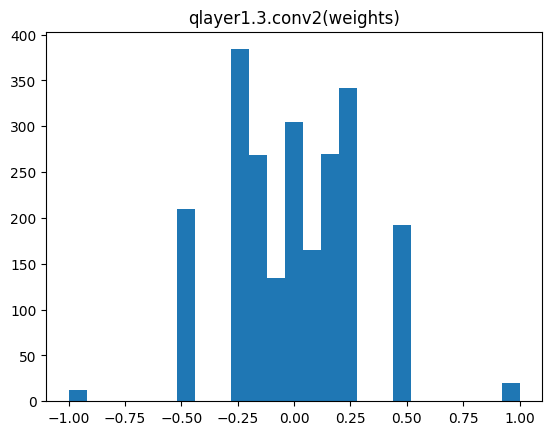

 ( -1.0000   1.0000)
qlayer1.3.relu2                  0.0000   1.0000

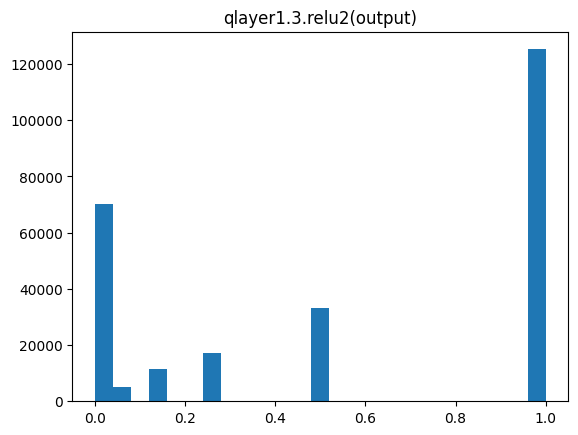


qlayer1.4.conv1                -15.7731  13.9726

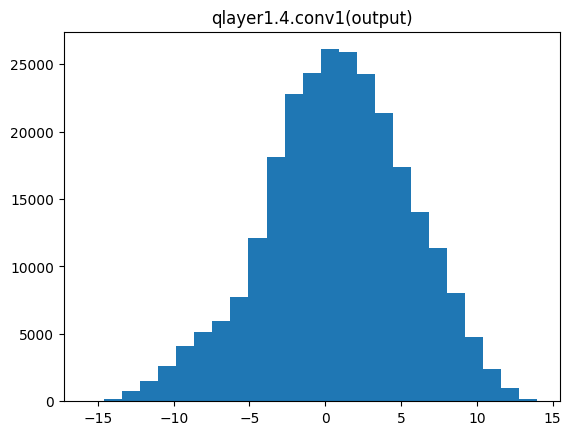

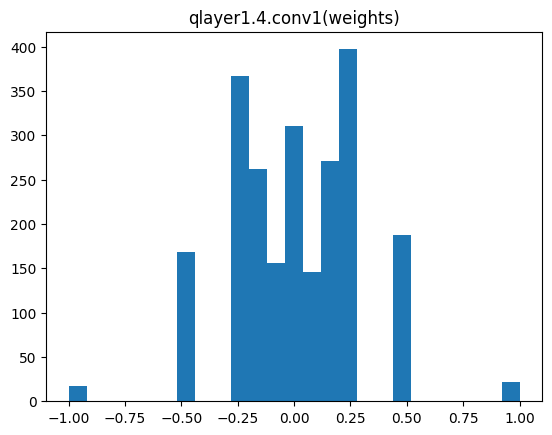

 ( -1.0000   1.0000)
qlayer1.4.relu1                  0.0000   1.0000

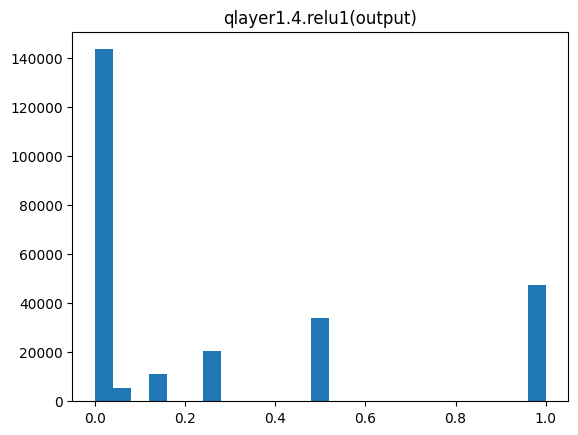


qlayer1.4.conv2                -10.7606  12.3319

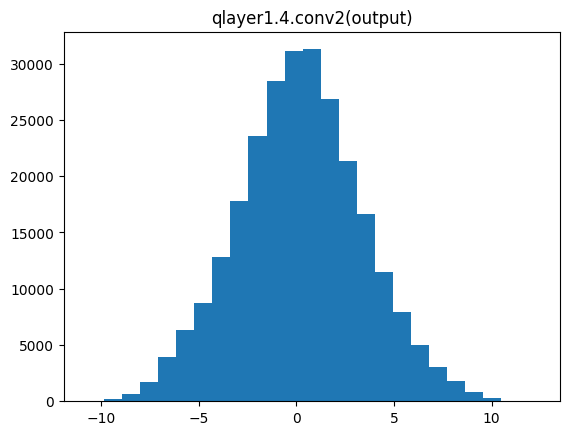

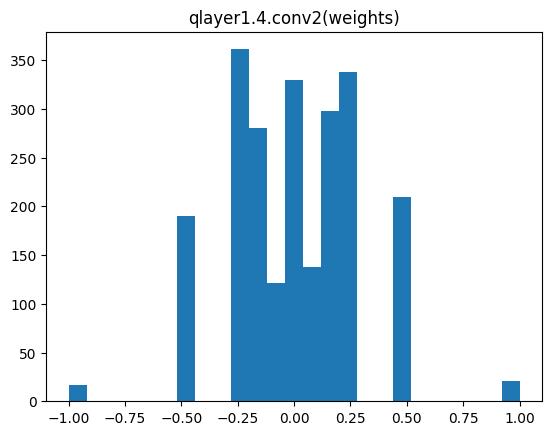

 ( -1.0000   1.0000)
qlayer1.4.relu2                  0.0000   1.0000

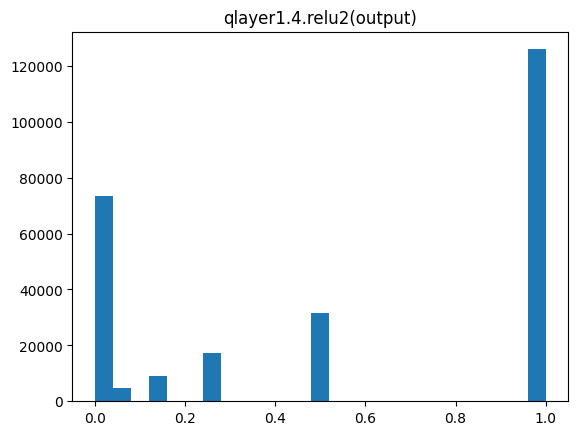


qlayer2.0.conv1                -15.3203  17.9472

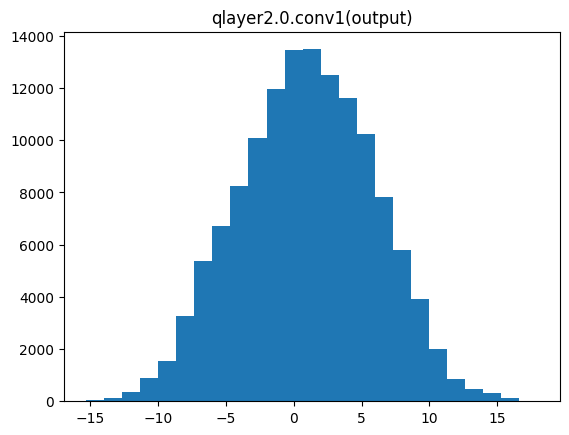

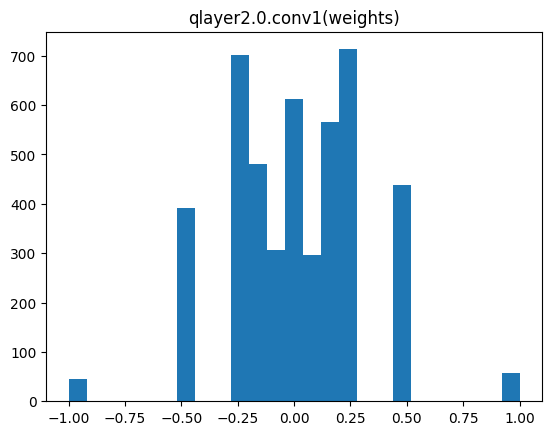

 ( -1.0000   1.0000)
qlayer2.0.relu1                  0.0000   1.0000

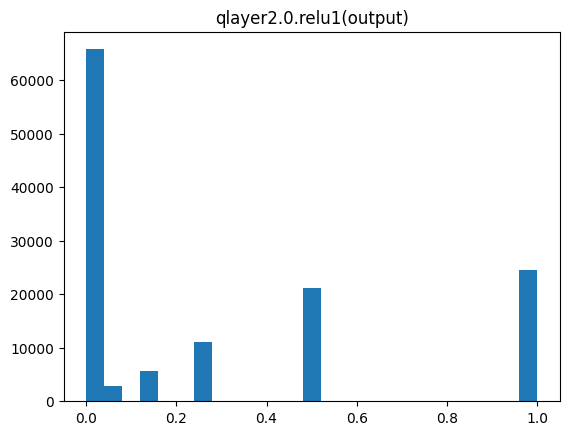


qlayer2.0.downsample.0          -5.9218   5.1875

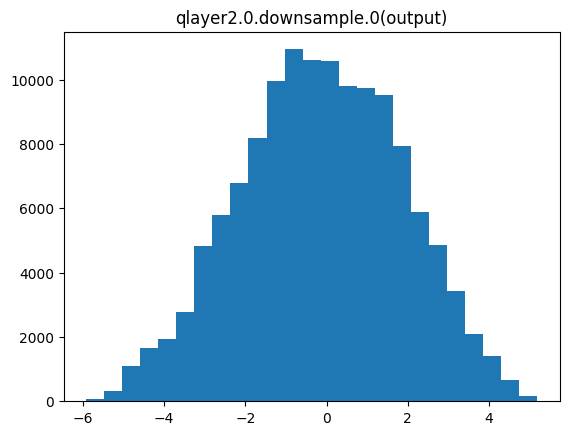

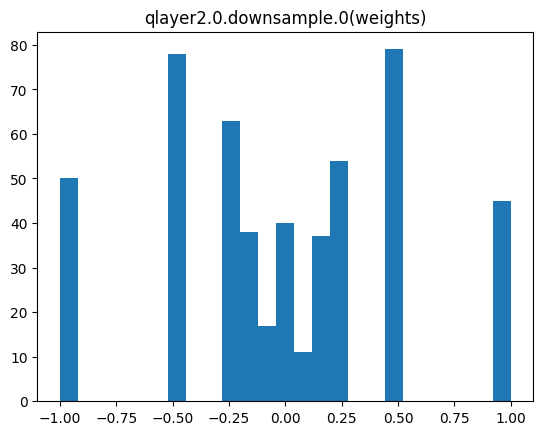

 ( -1.0000   1.0000)
qlayer2.0.conv2                -19.8851  19.1028

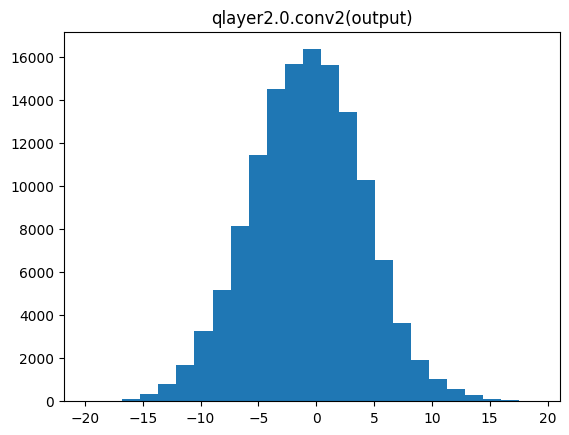

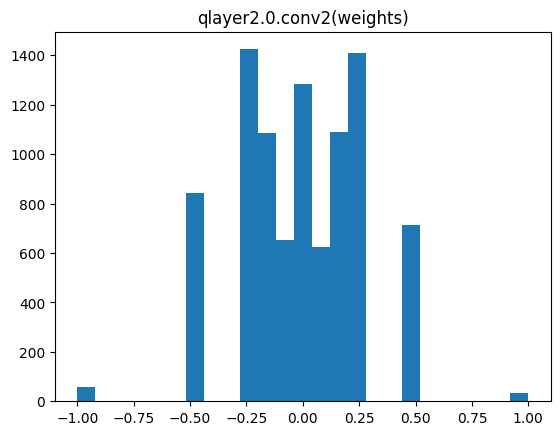

 ( -1.0000   1.0000)
qlayer2.0.relu2                  0.0000   1.0000

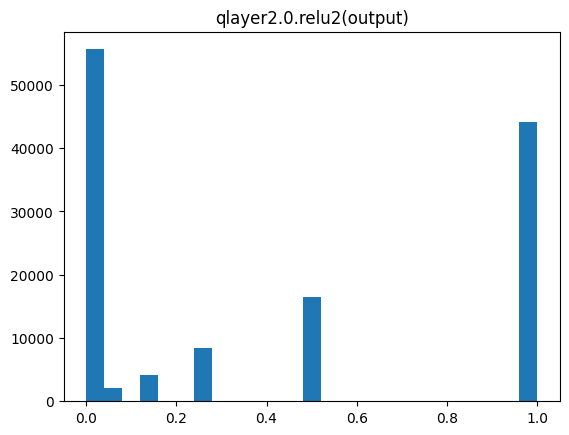


qlayer2.1.conv1                -23.5039  17.4139

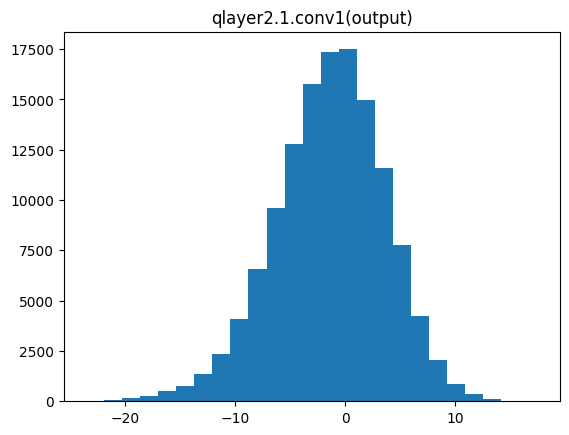

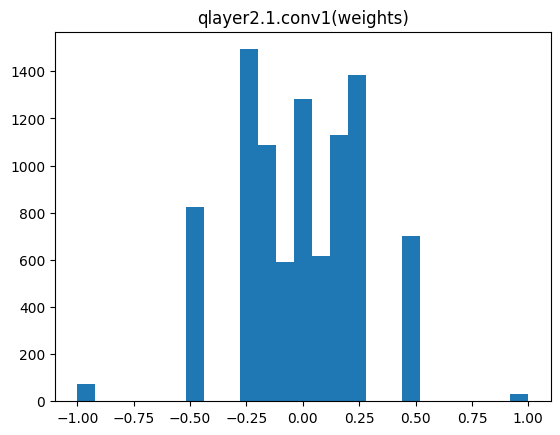

 ( -1.0000   1.0000)
qlayer2.1.relu1                  0.0000   1.0000

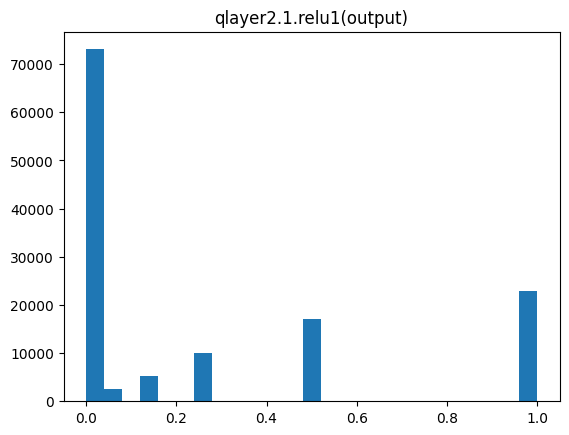


qlayer2.1.conv2                -14.7713  13.5368

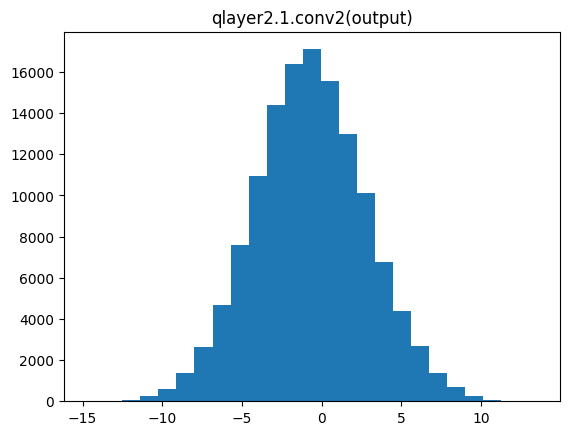

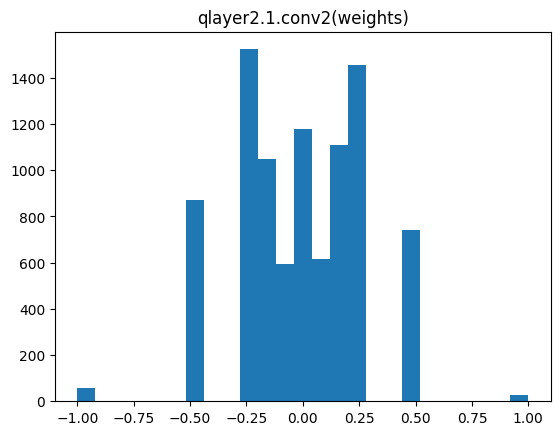

 ( -1.0000   1.0000)
qlayer2.1.relu2                  0.0000   1.0000

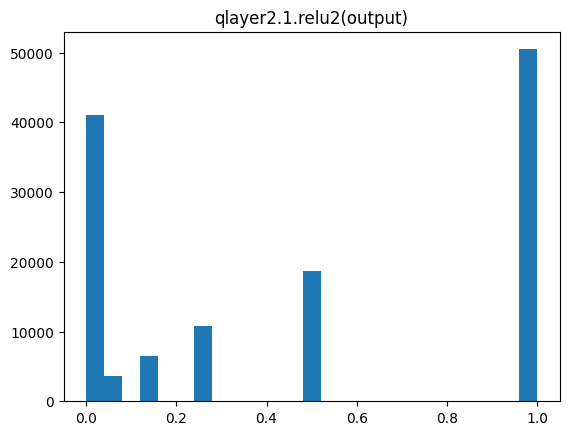


qlayer2.2.conv1                -26.5462  21.0863

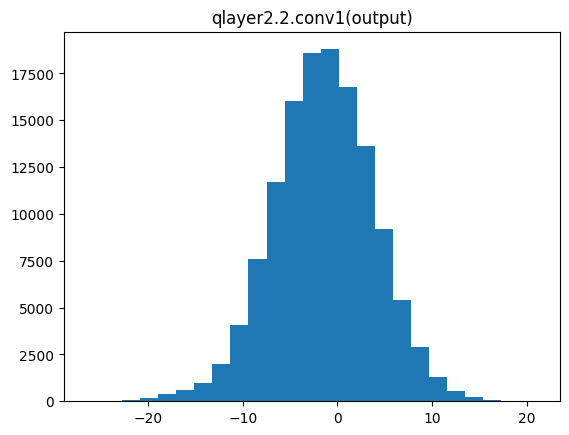

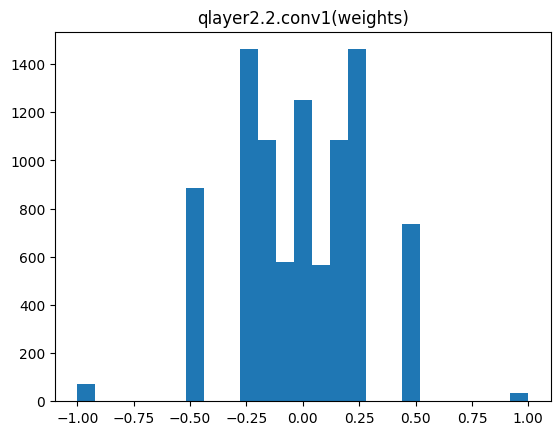

 ( -1.0000   1.0000)
qlayer2.2.relu1                  0.0000   1.0000

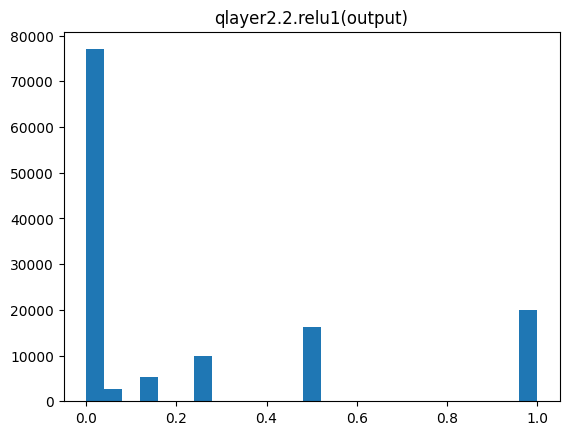


qlayer2.2.conv2                -14.2729  13.0622

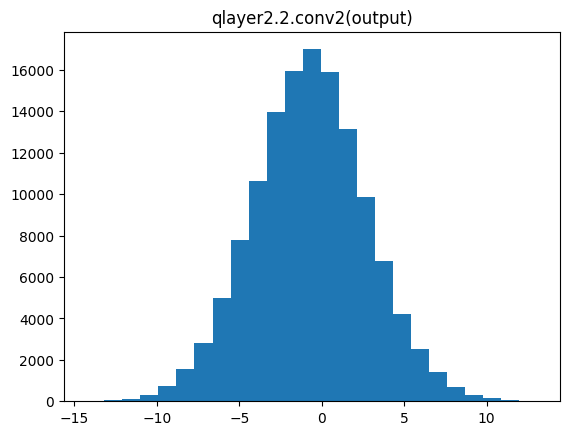

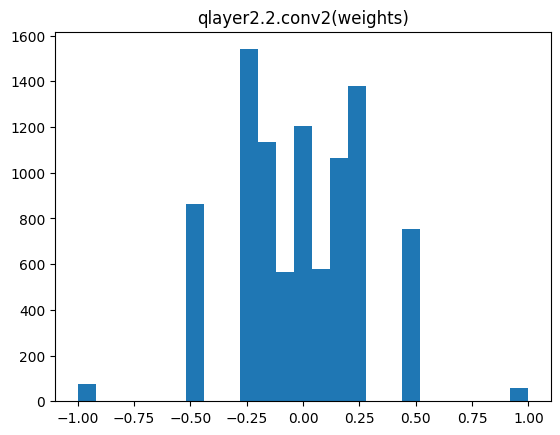

 ( -1.0000   1.0000)
qlayer2.2.relu2                  0.0000   1.0000

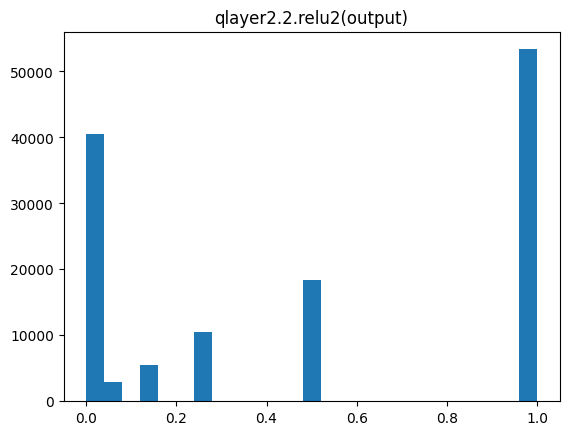


qlayer2.3.conv1                -20.6060  24.4907

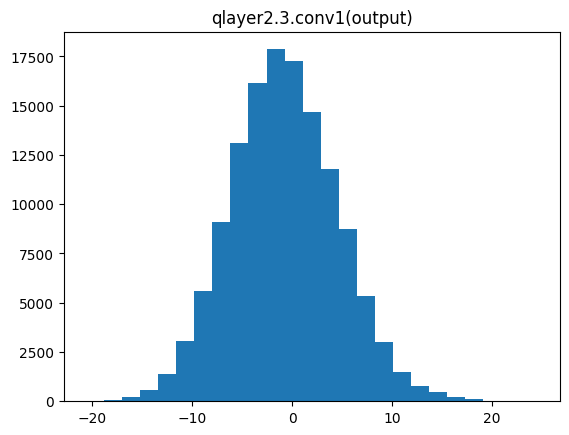

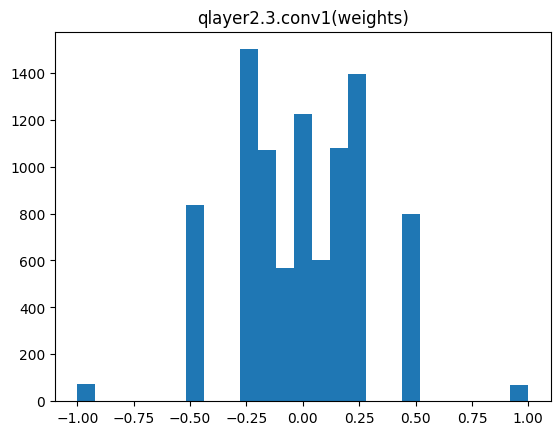

 ( -1.0000   1.0000)
qlayer2.3.relu1                  0.0000   1.0000

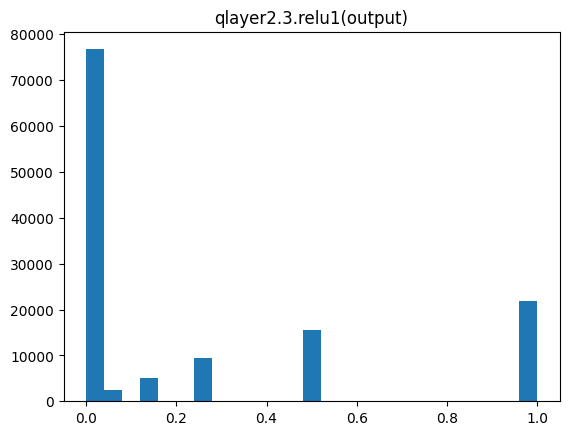


qlayer2.3.conv2                -18.7382  17.2372

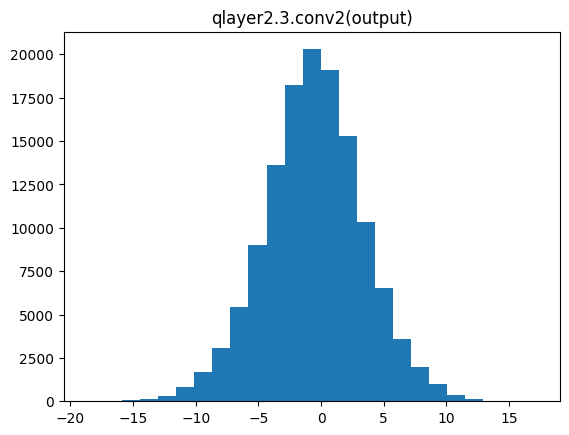

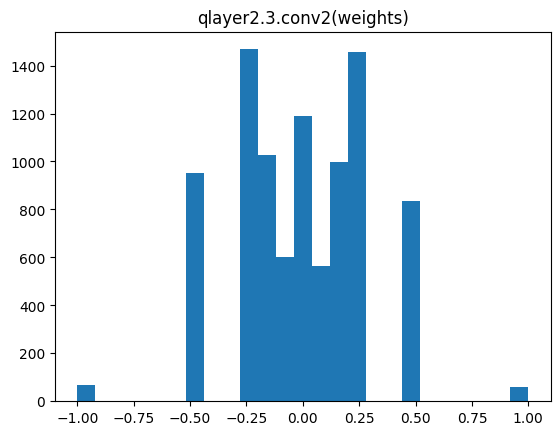

 ( -1.0000   1.0000)
qlayer2.3.relu2                  0.0000   1.0000

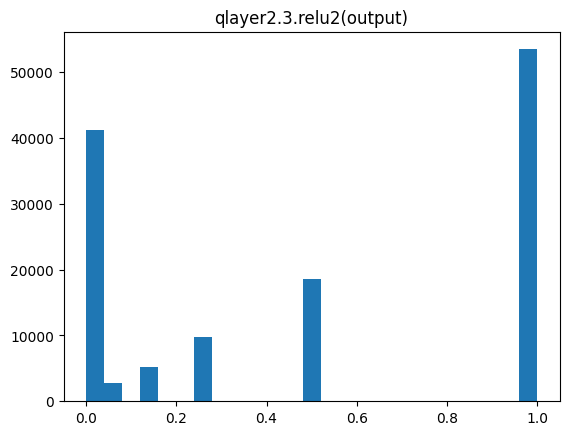


qlayer2.4.conv1                -27.0976  22.5584

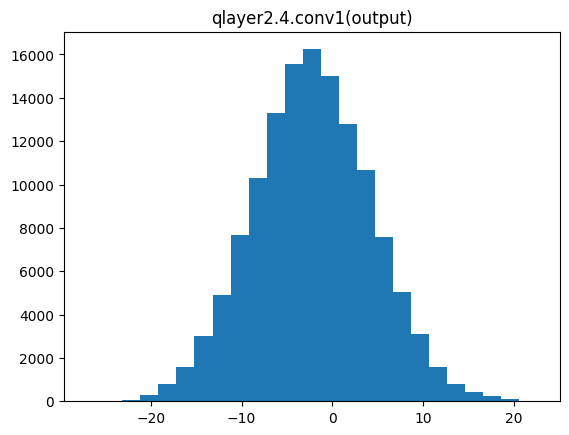

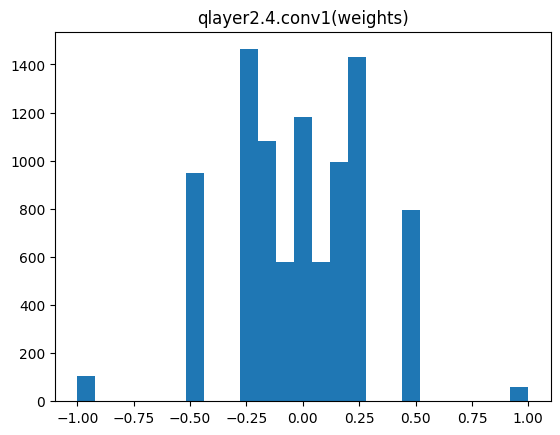

 ( -1.0000   1.0000)
qlayer2.4.relu1                  0.0000   1.0000

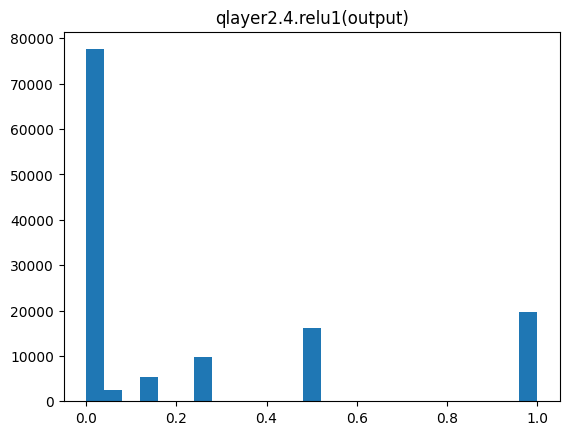


qlayer2.4.conv2                -19.0819  18.1401

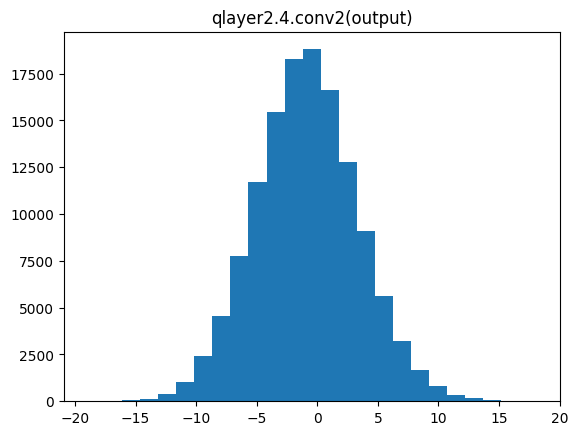

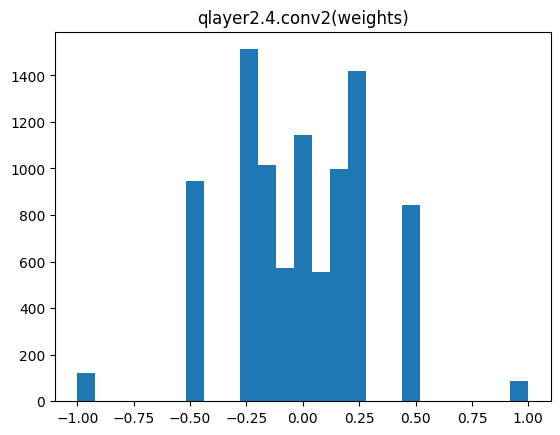

 ( -1.0000   1.0000)
qlayer2.4.relu2                  0.0000   1.0000

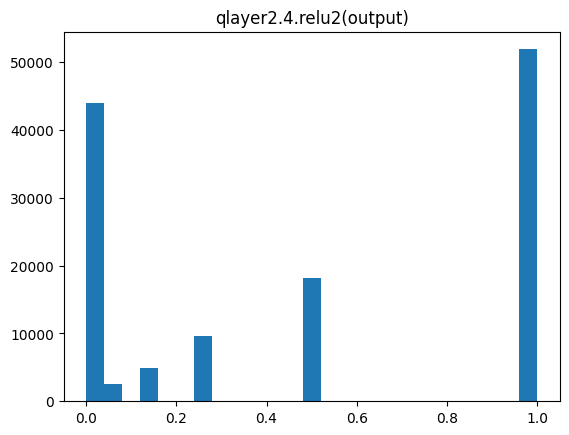


qlayer3.0.conv1                -24.3183  26.3886

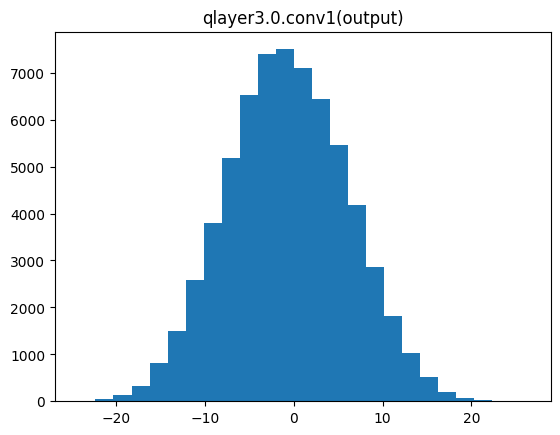

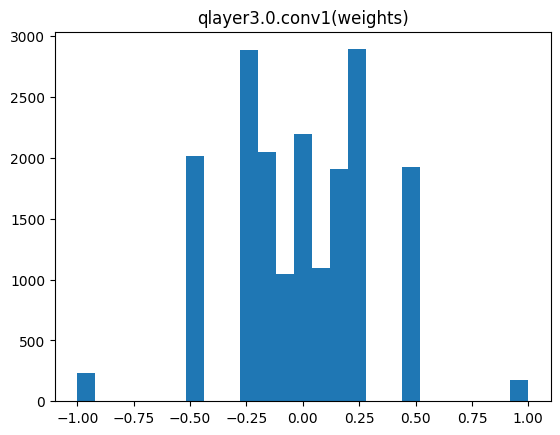

 ( -1.0000   1.0000)
qlayer3.0.relu1                  0.0000   1.0000

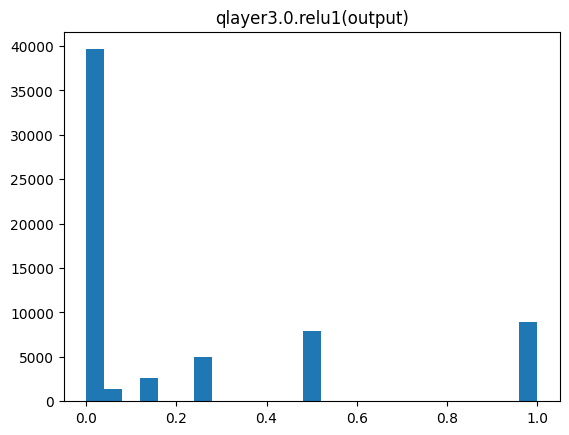


qlayer3.0.downsample.0          -9.0625   7.7812

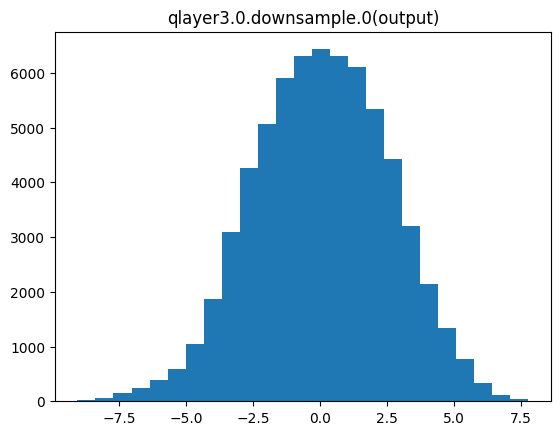

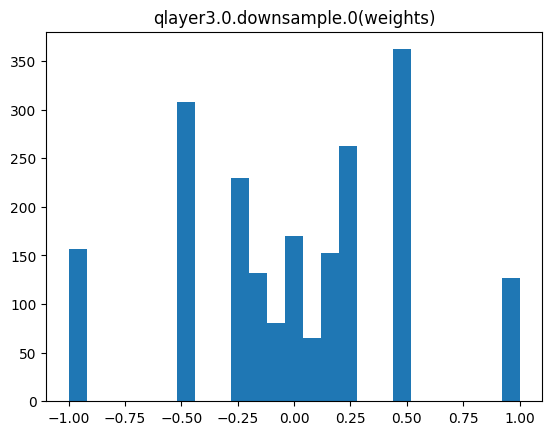

 ( -1.0000   1.0000)
qlayer3.0.conv2                -24.7739  17.9856

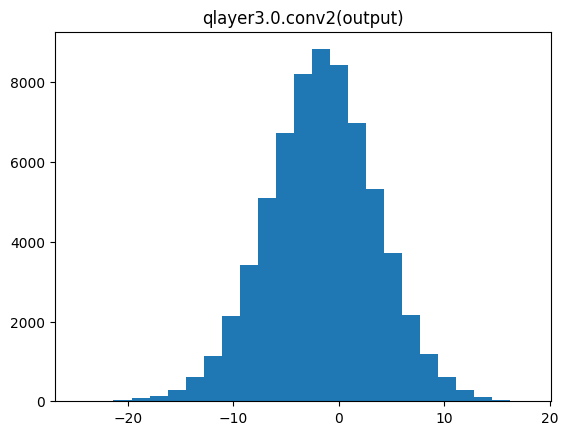

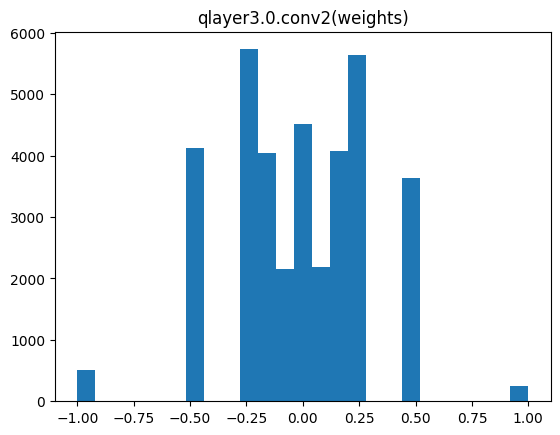

 ( -1.0000   1.0000)
qlayer3.0.relu2                  0.0000   1.0000

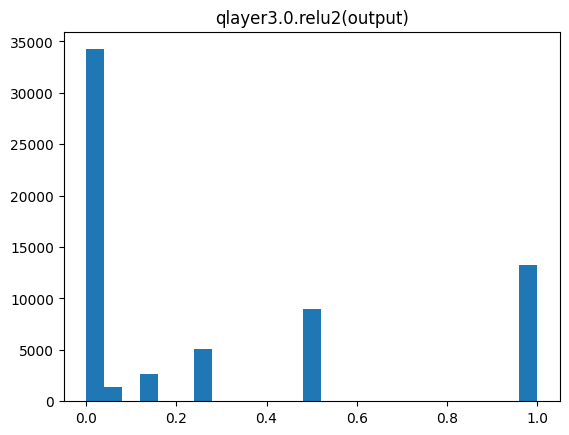


qlayer3.1.conv1                -29.6229  22.9676

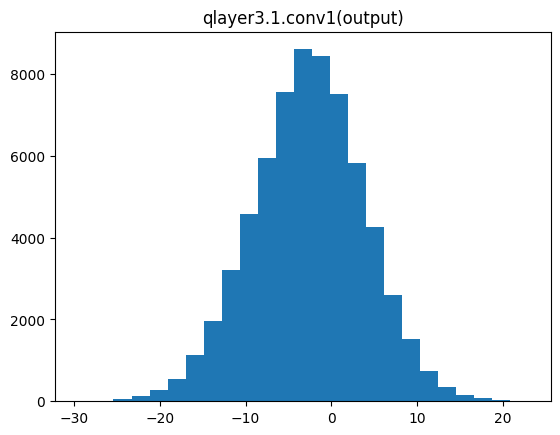

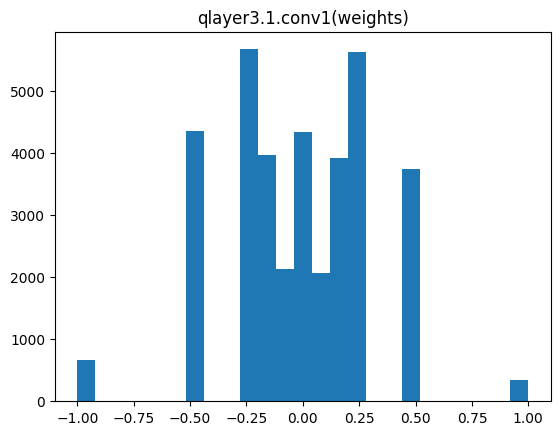

 ( -1.0000   1.0000)
qlayer3.1.relu1                  0.0000   1.0000

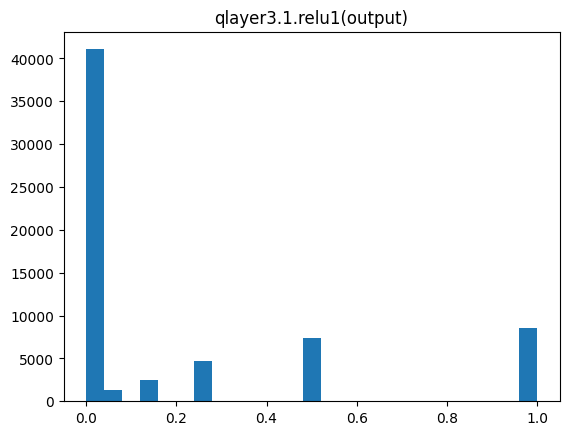


qlayer3.1.conv2                -23.1592  19.6492

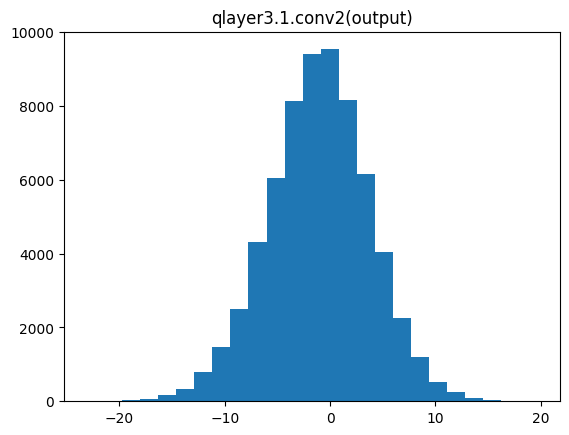

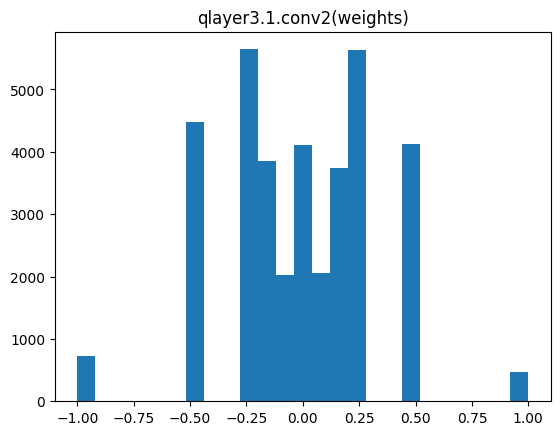

 ( -1.0000   1.0000)
qlayer3.1.relu2                  0.0000   1.0000

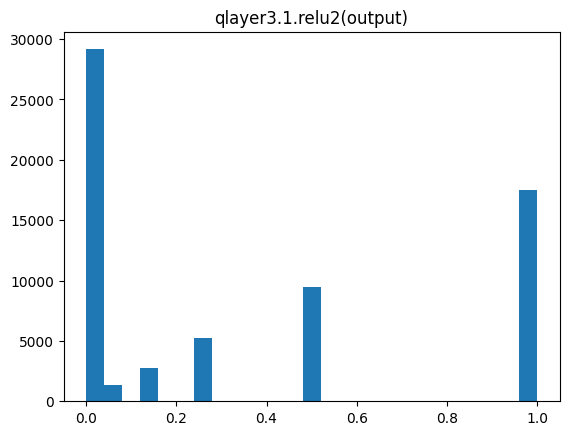


qlayer3.2.conv1                -36.0853  27.7545

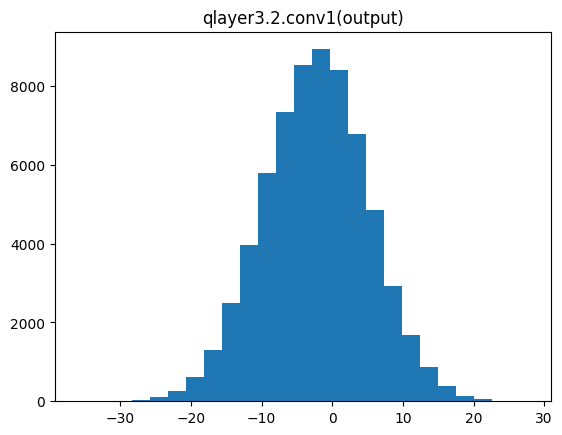

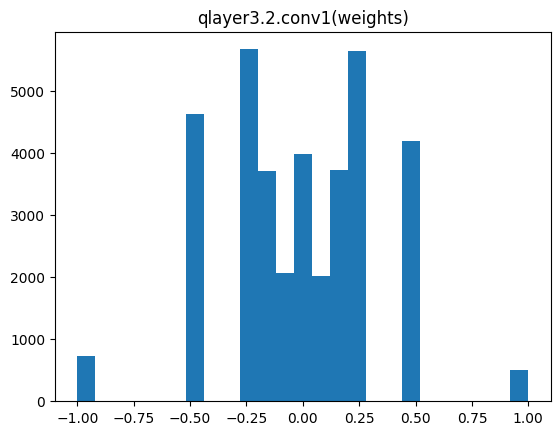

 ( -1.0000   1.0000)
qlayer3.2.relu1                  0.0000   1.0000

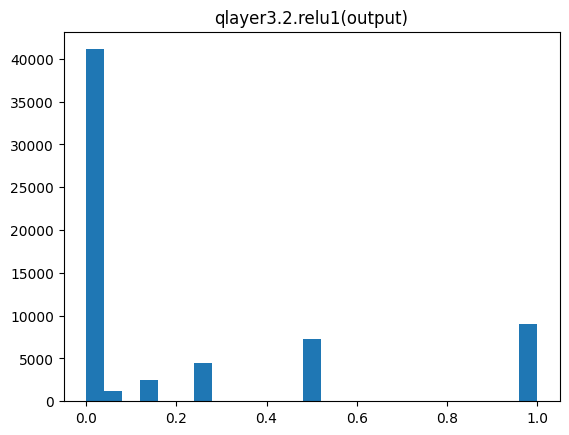


qlayer3.2.conv2                -22.5060  22.1774

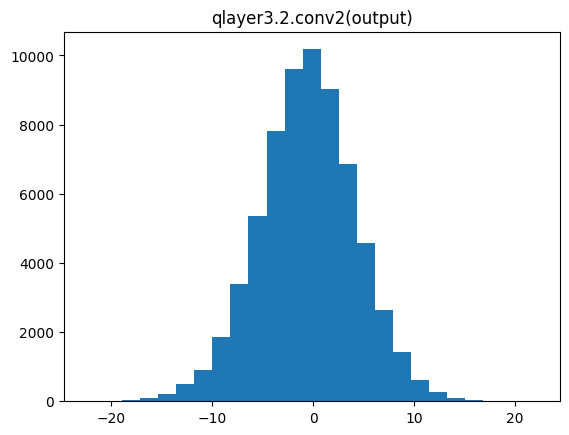

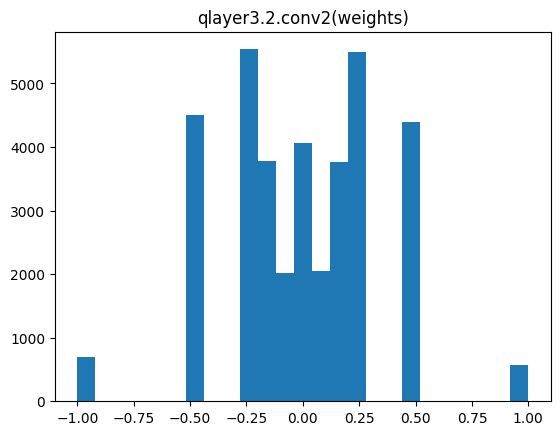

 ( -1.0000   1.0000)
qlayer3.2.relu2                  0.0000   1.0000

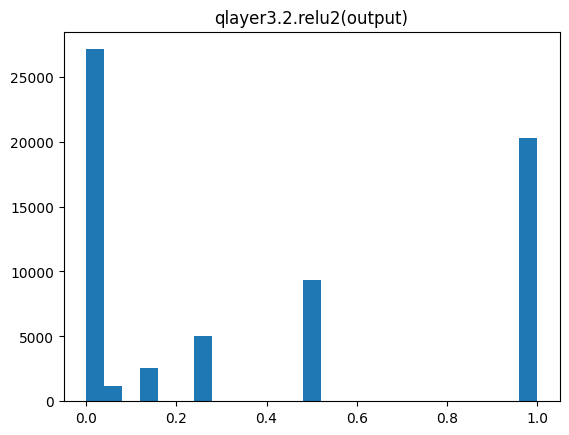


qlayer3.3.conv1                -31.6203  31.7605

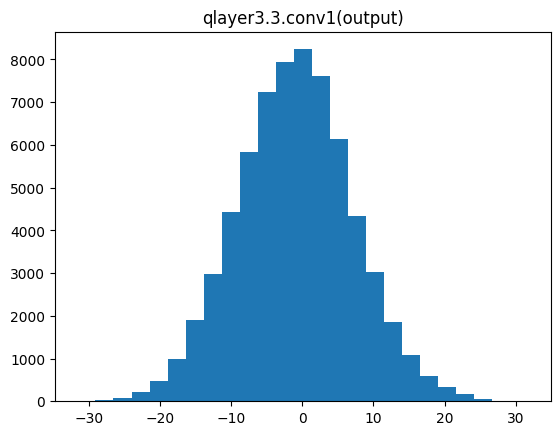

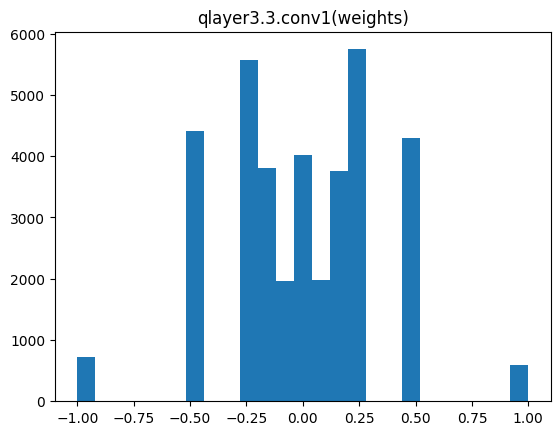

 ( -1.0000   1.0000)
qlayer3.3.relu1                  0.0000   1.0000

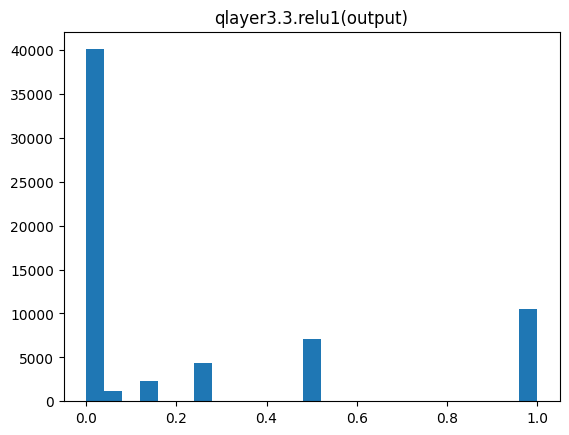


qlayer3.3.conv2                -26.2005  22.1740

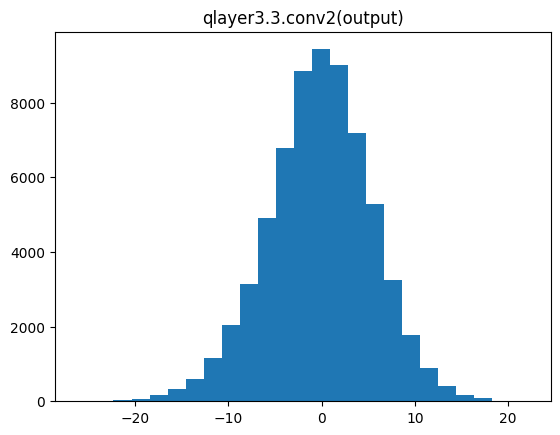

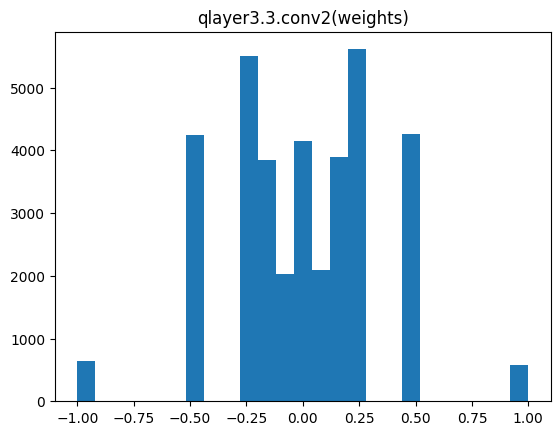

 ( -1.0000   1.0000)
qlayer3.3.relu2                  0.0000   1.0000

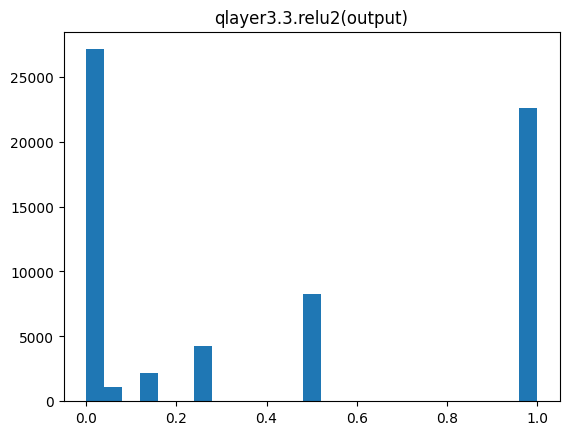


qlayer3.4.conv1                -39.9462  29.9917

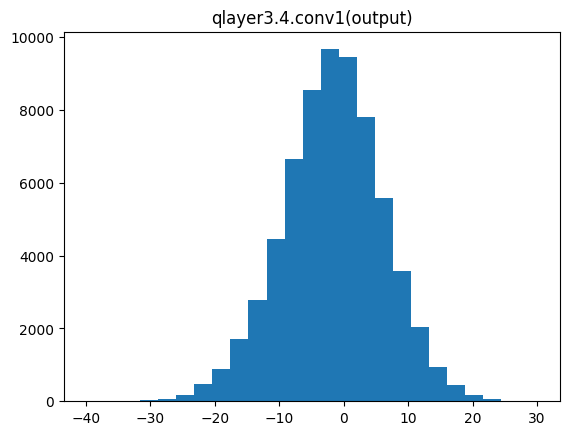

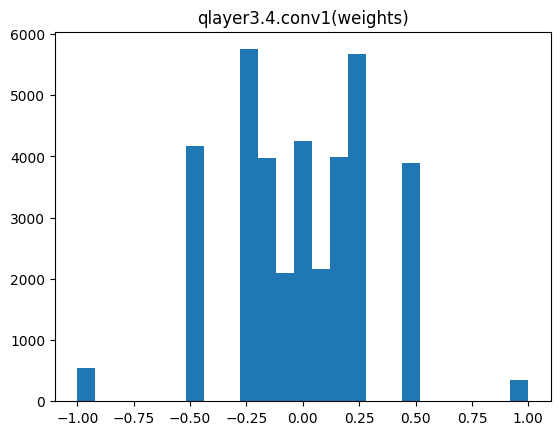

 ( -1.0000   1.0000)
qlayer3.4.relu1                  0.0000   1.0000

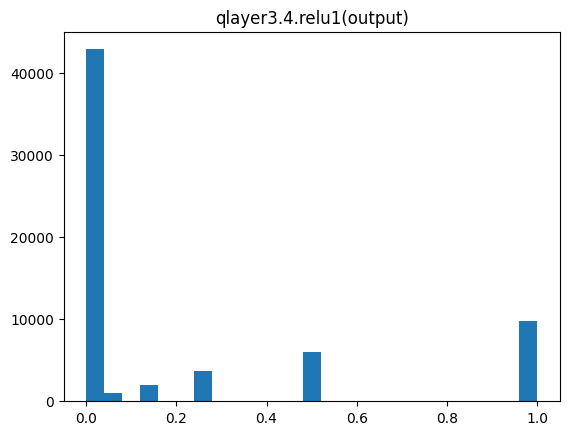


qlayer3.4.conv2                -21.9279  25.6705

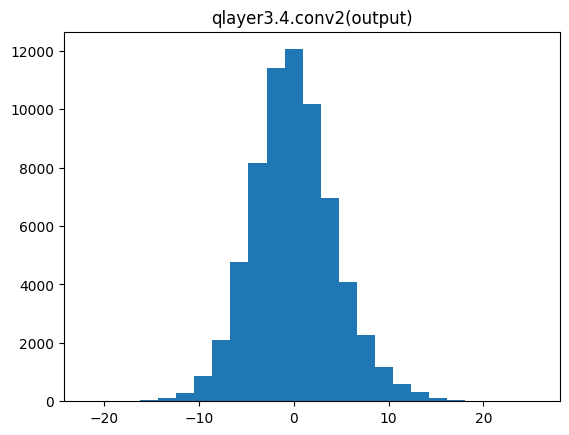

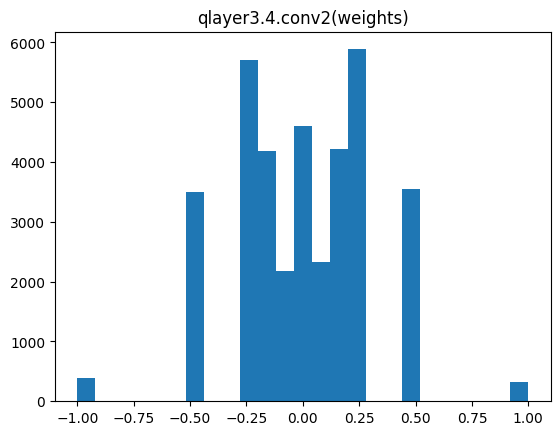

 ( -1.0000   1.0000)
qlayer3.4.relu2                  0.0000   1.0000

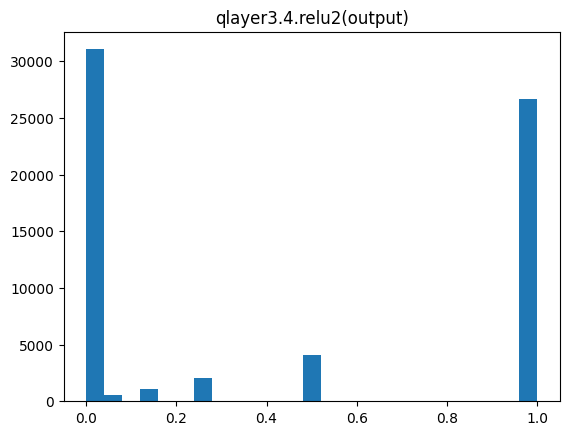

In [38]:
from qkeras.utils import quantized_model_debug
quantized_model_debug(qmodel, x_test[:16], True, plt)

In [39]:
from qkeras.utils import load_qmodel

qmodel.save("qmodels/resnet32_hybrid/model.h5")
qmodel_load_test = load_qmodel("C:/Users/georg/Desktop/mestrado_luiz/deep_nibble_dnn/qkera_experiments/qmodels/resnet32_hybrid/model.h5")
qmodel_load_test.evaluate(x_test, y_test)

313/313 [==============================] - 11s 27ms/step - loss: 1.1779 - accuracy: 0.7028


[1.1779377460479736, 0.7027999758720398]